# Importing and Cleaning the Data

I have been given data of 1000 different reviews from 3 different companies: Amazon, IMDB, and Yelp. The data contains the review in it's entirety (all reviews are only about one sentence long) and whether or not the review was a positive or a negative one. (and there is a equal split between positive and negative) I will be creating a sentiment classifer that can predict whether or not the review was a positive or a negative one based on word choice. 

All 3 set of reviews have very different contexts. Amazon, IMDB, and Yelp reviews are of products, movies, and resturants respectively. Is is possible to create a classifier that can apply to all 3 situations?

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import codecs
import random
from collections import Counter
from IPython.core.display import HTML
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler

%matplotlib inline

I will focus on one group of reviews at first, Amazon's. The data has come to me as a text file so I will need to do a little bit of cleaning to get it into a workable format.

In [2]:
with codecs.open('amazon_cells_labelled.txt', "r",encoding='utf-8', errors='ignore') as fdata:
    sentiment_raw = fdata.read()

In [62]:
#print(sentiment_raw[0:500])

In [4]:
sentiment_split = sentiment_raw.split('\n')

In [57]:
sentiment_series = pd.Series(sentiment_split)
display(sentiment_series.head())
#display(sentiment_series[1000])

0    So there is no way for me to plug it in here i...
1                       Good case, Excellent value.\t1
2                            Great for the jawbone.\t1
3    Tied to charger for conversations lasting more...
4                                 The mic is great.\t1
dtype: object

In [6]:
del sentiment_series[1000]

In [7]:
sentiment = sentiment_series.str.split('\t',n=2,expand=True)
sentiment.columns = ['Message', 'Positive']

In [59]:
print(sentiment.shape)
display(sentiment.head())


(1000, 2)


,Message,Positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# Creating the Classifier

Now that I have a the amazon review data in a workable format, I'll create a dataframe to store the results of my classifications. Then, I will create a list of positive and negative words that the model and can use to identify a positive or negative comment.

In [75]:
features = pd.DataFrame()

features['Positive'] = sentiment['Positive'].apply({'1' :True, '0' :False}.get)

keywords_pos = ['good','great','awesome','like','liked','love','loved','well','best','better','excellent','must have']

for key in keywords_pos:
    features[str(key)] = sentiment.Message.str.contains(str(key),case=False)
    
keywords_neg = ["disappoint","disappointed","hate","hated","awful",'does not work', "doesn't work","negative",
                'unsatisfactory','problem','junk','not enough','fooled','waste','regret']

for key in keywords_neg:
    features[str(key)] = True
    for i in range(1000):
        features[str(key)][i] = key not in sentiment['Message'][i].lower()

In [76]:
#display(features.head())

I'll display a heatmap to better see how my classifiers interact

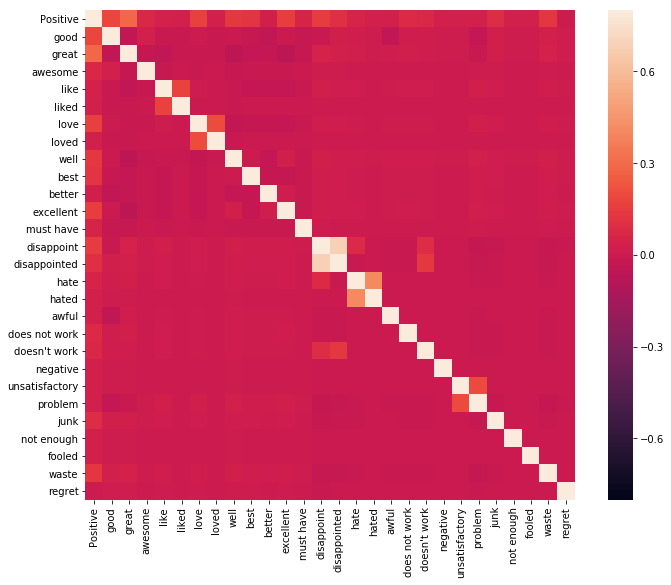

In [77]:
fcorr = features.corr()
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(fcorr, vmax=.8, vmin=-0.8, square=True)
plt.show()

In [86]:
data = features[keywords_pos + keywords_neg]
target = features['Positive']

In [87]:
#the data is binary, so I will use a binary model
bnb = BernoulliNB()
bnb.fit(data, target)

#Store the predicted values
y_pred = bnb.fit(data, target).predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 271


In [88]:
y_pred.sum()/1000

0.319

## The Other Reviews

Now I'll see if the classifier I made for Amazon reviews will also work for IMDB and Yelp reviews.  I repeat the importing, cleaning, and classification process on both sets of reviews.

In [63]:
with codecs.open('imdb_labelled.txt', "r",encoding='utf-8', errors='ignore') as fdata:
    imdb_raw = fdata.read()

In [64]:
imdb_split = imdb_raw.split('\n')
imdb_series = pd.Series(imdb_split)
del imdb_series[1000]
imdb = imdb_series.str.split('\t',n=2,expand=True)
imdb.columns = ['Message', 'Positive']

In [65]:
display(imdb.head())

,Message,Positive
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [66]:
#initiate features df with same keywords as before (keywords_pos and keywords_neg)
features_imdb = pd.DataFrame()

features_imdb['Positive'] = imdb['Positive'].apply({'1' :True, '0' :False}.get)

for key in keywords_pos:
    features_imdb[str(key)] = imdb.Message.str.contains(str(key),case=False)

for key in keywords_neg:
    features_imdb[str(key)] = True
    for i in range(1000):
        features_imdb[str(key)][i] = key not in imdb['Message'][i].lower()

In [67]:
#Run Prediction and Record Results
targeti = features_imdb['Positive']
datai = features_imdb[keywords_pos + keywords_neg]

bnbi = BernoulliNB()
bnbi.fit(datai, targeti)

y_predi = bnbi.predict(datai)

In [68]:
with codecs.open('yelp_labelled.txt', "r",encoding='utf-8', errors='ignore') as fdata:
    yelp_raw = fdata.read()

In [69]:
yelp_split = yelp_raw.split('\n')
yelp_series = pd.Series(yelp_split)
del yelp_series[1000]
yelp = yelp_series.str.split('\t',n=2,expand=True)
yelp.columns = ['Message', 'Positive']

In [70]:
display(yelp.head())

,Message,Positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [71]:
#initiate features df with same keywords as before
features_yelp = pd.DataFrame()

features_yelp['Positive'] = yelp['Positive'].apply({'1' :True, '0' :False}.get)

for key in keywords_pos:
    features_yelp[str(key)] = yelp.Message.str.contains(str(key),case=False)

for key in keywords_neg:
    features_yelp[str(key)] = True
    for i in range(1000):
        features_yelp[str(key)][i] = key not in yelp['Message'][i].lower()

In [72]:
#Run Prediction and Record Results
targety = features_yelp['Positive']
datay = features_yelp[keywords_pos + keywords_neg]

bnby = BernoulliNB()
bnby.fit(datay, targety)

y_predy = bnby.predict(datay)

In [73]:
print("IMDB reviews were mispredicted {} times out of {} total points".format((targeti != y_predi).sum(),datai.shape[0]))
print("Yelp reviews were mispredicted {} times out of {} total points".format((targety != y_predy).sum(),datay.shape[0]))

IMDB reviews were mispredicted 375 times out of 1000 total points
Yelp reviews were mispredicted 342 times out of 1000 total points


The predictor is certainly more suited to detecting sentiment in amazon reviews, but it was still somewhat accurate with reviews in other contexts.

# Evaluating the Classifier

Now I should evaluate the health of my classifier, I can look at it with many different tests.

The first thing I'll do is creat a confusion matrix. This will let me see what type of errors my classifier is encountering.

In [102]:
from sklearn.metrics import confusion_matrix

a,b,c,d = confusion_matrix(target,y_pred).ravel()

print(confusion_matrix(target,y_pred))
print("Correctly identified {} negative reviews, misidenfied {} negative reviews".format(a,b))
print("Correctly identified {} positive reviews, misidenfied {} positive rreviews".format(d,c))

[[455  45]
 [226 274]]
Correctly identified 455 negative reviews, misidenfied 45 negative reviews
Correctly identified 274 positive reviews, misidenfied 226 positive rreviews


It seems our classfier is very good at identifying negative reviews, but it absolutely awful and predicting positive ones, barely getting a better result than if it had just blindly guessed.

Next, I'll do is a __Holdout Group Test__. In this test, I will run a prediction with all the data and compare it to a prediction with a portion of the data removed, they should be the same or similar. Here, I'll choose to do the test with 10% of the data held out.  Usually it's better to holdout more, but the sample is not bery large and I want to make sure the holdout will still have a representative sameple.

In [98]:
from sklearn.model_selection import train_test_split

# creating the groups needed to test the data with a 10% holdout
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=20)
print('With 10% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('With Whole Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 10% Holdout: 0.73
With Whole Sample: 0.729


These results are great! Though the results are a little different, indicating that there may be some overfitting, they are similar enough that it should be fine.

Finally, I will do a __Cross Validation Test__. In this test, the data is split into a specified number of groups and the accuracy of each groups' respective predictions are compared against each other. If there are no outliers and the data is all accurately described, the predictions should be similar amoung all groups.  Like before, I will chose a smaller number of groups than is usually desired, since my data is small, 5 groups to be exact.

In [99]:
from sklearn.model_selection import cross_val_score

display(cross_val_score(bnb, data, target, cv=5))

array([0.75 , 0.755, 0.715, 0.665, 0.675])

These results are a little worrying, the difference in scores indicates that there might be some outliers. In the case of our data, that may indicate that there are some comments which are not enitrely explained by our selected features, indicating we need to make more. 

The classifier is not inherently flawed by any means, but there is still some work to do on it.